# CS145 Introduction to Data Mining - Assignment 1
## Deadline: 11:59PM, January 14, 2025

## Instructions
Each assignment is structured as a Jupyter notebook, offering interactive tutorials that align with our lectures. You will encounter two types of problems: *write-up problems* and *coding problems*.

1. **Write-up Problems:** These problems are primarily theoretical, requiring you to demonstrate your understanding of lecture concepts and to provide mathematical proofs or derivations. Your answers should include sufficient steps for the mathematical derivations.
2. **Coding Problems:** Here, you will be engaging with practical coding tasks. These may involve completing code segments provided in the notebooks or developing models from scratch.

To ensure clarity and consistency in your submissions, please adhere to the following guidelines:

* For write-up problems, use Markdown bullet points to format text answers. Also, express all mathematical equations using $\LaTeX$ and avoid plain text such as `x0`, `x^1`, or `R x Q` for equations.
* For coding problems, comment on your code thoroughly for readability and ensure your code is executable. Non-runnable code may lead to a loss of **all** points. Coding problems have automated grading, and altering the grading code will result in a deduction of **all** points.
* Your submission should show the entire process of data loading, preprocessing, model implementation, training, and result analysis. This can be achieved through a mix of explanatory text cells, inline comments, intermediate result displays, and experimental visualizations.

### Submission Requirements

* Submit your ipynb through GradeScope in BruinLearn. Submission in PDF format will not be graded.
* Late submissions are allowed up to 24 hours post-deadline with a penalty factor of
  $$
  \mathbf{1}(t \leq 24) \, e^{-(\ln(2)/12) t}.
  $$

### Collaboration and Integrity

* Collaboration is encouraged, but all final submissions must be your own work. Please acknowledge any collaboration or external sources used, including websites, papers, and GitHub repositories.
* Any suspicious cases of academic misconduct will be reported to The Office of the Dean of Students.

---

## Outline
* **Part 1: Write-up (90 points)**
  1. Introduction & Know Your Data  
  2. Linear Regression  
  3. Logistic Regression & Classification
* **Part 2: Coding (40 points)**
  1. Exploratory Data Analysis & Preprocessing (8 points)  
  2. Linear Regression with Regularization and Cross Validation (12 points)  
  3. Logistic Regression with Regularization and Cross Validation (10 points)  
  4. Implement Gradient Descent and Compare with Sklearn (10 points)

---

## Part 1: Write-up (90 points)

### 1. Introduction & Know Your Data (30 points)

1. **One-Hot Encoding (10 points)**  
   One-hot-encoding is a process of converting a single categorical variable with $k$ discrete values into $k$ binary variables (indicators). In which scenarios is one-hot-encoding particularly important, and in which cases might it be inappropriate or unnecessary? Consider the following examples and state whether or not you would apply one-hot-encoding, and why:
   - (a) Zipcode  
   - (b) Income Level (e.g., discrete categories such as `low`, `medium`, `high`)  
   - (c) Age  
   - (d) Cuisine Category  
   - (e) All the states in the U.S.  

2. **True/False: Simple Explanations (10 points)**  
   For each statement below, write **True** or **False**, and provide a **brief** justification (1-3 sentences) for your answer:
   - (a) Categorical variables can only be used when the number of categories is finite.  
   - (b) *Correlation* refers to the linear dependence between two variables.  
   - (c) Supervised learning and unsupervised learning differ in that supervised learning requires labeled data while unsupervised learning does not.  
   - (d) Median is usually preferred over mean as a summary statistic when there are extreme outliers.  
   - (e) Sample variance is an unbiased estimator of the population variance.

3. **Data Preprocessing (10 points)**  
   (a) Why are normalization or standardization useful steps in data preprocessing?  
   (b) List two ways to normalize a dataset.  
   (c) Name two ways to deal with missing values and explain when/why each approach might be used.  
   (d) Suppose you have a table with 4 columns: 3 numeric columns and 1 categorical column. You want to predict one numeric column from the remaining three columns.  
   - What type of machine learning task is this?  
   - What preprocessing steps might you consider for the 3 feature columns?

**[TODO: Provide your responses here. ]**

##### 1.
A. Zipcodes can be a possible use case since there's no inherent order, however, there may be too many categories making one-hot encoding inefficient. Therefore, it may be unnecessary.

B. No you would not use one hot encoding here since, even though there are categories, there income level is an ordinal variable. Since there is inherent order within these categories, unfortunately, one-hot encoding erases this relationship, meaning one hot encoding is inappropriate for this use case.

C. No you would not use one hot encoding here since age is not a categorical variable but rather numerical and contains order. Inappropriate. 

D. Yes one hot encoding would be particularly important in this case, since the Cuisine Categories is categorical and the categories are unrelated.

E. One hot encoding is useful in this case as well for the same reasons as D. However, due to the large number of states, other methods may be preferred for performance.

##### 2.
A. True. If the number of categories is finite, it would cease to be categoriccal anymore but more like something thats continuous. 

B. True. This is the definition of correlation.

C. True. Supervised learning means we know the correct answers, or the training data has labels. Unsupervised data means we don't know the right answer, or we don't have the labels.

D. True. The median is by definition, more resistant to extreme outliars than the mean. 

E. True if we divide by n-1. False if we divide by n.

##### 3.
A. So we can deal with data on a similar scale. Without scaling with normalization or standardization, outliers may have larger effects. Also, its just easier to deal with data if its normalized. Very useful for KNN, SVM, and NNs

B. 

i. Min-Max: $$x_{\text{scaled}} = \frac{x - \min(x)}{\max(x) - \min(x)}$$
    
ii. Z-score: $$x_{\text{standardized}} = \frac{x - \mu}{\sigma}$$

C. 

i. Replace with mean, median or mode. Missing data is random and small in amount. Mean if normal. Median for skewed. 
    
ii. Drop the whole record. Too many missing values, drop rows if only a few are affected, drop column if its mostly missing.

D. Regression because we're predicting a numeric value. We would need to one-hot encode the categorical data column. And then normalize/standardize the other 2 numeric data columns.


### 2. Linear Regression (30 points)

Consider a dataset with $n$ samples and $d$ features, where $\boldsymbol{X} \in \mathbb{R}^{n \times d}$ is the feature matrix and $\boldsymbol{y} \in \mathbb{R}^n$ is the target vector.

1. **Closed-form for Ridge Regression (10 points)**  
   Recall the Ridge regression objective:  
   $$
   J(\boldsymbol{w}) = \frac{1}{2n} \sum_{i=1}^n \bigl(\boldsymbol{x}_i^\top \boldsymbol{w} - y_i\bigr)^2 \;+\; \frac{\lambda}{2n}\|\boldsymbol{w}\|_2^2,
   $$
   where $\boldsymbol{w}\in \mathbb{R}^d$, $\lambda \ge 0$ is the regularization parameter, and $\|\boldsymbol{w}\|_2^2 = \sum_{j=1}^d w_j^2$.  
   **Task:** Derive the closed-form solution for $\boldsymbol{w}^\star$. Show your steps:
   - Write $J(\boldsymbol{w})$ in matrix form.  
   - Take the gradient w.r.t.\ $\boldsymbol{w}$.  
   - Set the gradient to zero and solve for $\boldsymbol{w}^\star$.  

2. **Regularization Intuition (5 points)**  
   Recall the question from lecture: *When $\lambda$ is very large (i.e., goes to infinity) in Ridge regression, what happens to the magnitude of the weights?* Explain why this leads to a simpler or more complex model.

3. **Bias and Variance in High-degree Polynomials (5 points)**  
   Suppose you fit a polynomial regression model with a very high polynomial degree to a small dataset:
   - (a) How does this typically affect the model’s bias and variance?  
   - (b) In practice, what approaches might help mitigate overfitting in a high-degree polynomial scenario?

4. **Ridge vs. No Regularization (5 points)**  
   If you train a model without any regularization vs. a model with $\lambda > 0$ (Ridge regression), how can this alter the learned weights and generalization performance? Provide a short explanation.

5. **2D Residual Analysis (5 points)**  
   You have data with two features $X_1, X_2$ and one target $Y$. You fit a linear regression model:  
   $$
   \hat{Y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2.
   $$
   If you plot $(\hat{Y} - Y)$ (the residual) against $X_1$ and $X_2$ and observe distinct patterns, what might that suggest about your model or data?

**[TODO: Provide your responses here. ]**

##### 1.

Matrix Form: J(w) = $\frac{1}{2n} (Xw - y)^\top (Xw - y) + \frac{\lambda}{2n} w^\top w$

Gradient: $\nabla_w J(w) = \frac{1}{n} X^\top (Xw - y) + \frac{\lambda}{n} w$

w_star: 
$$
    \frac{1}{n} X^\top (Xw - y) + \frac{\lambda}{n} w = 0
$$
$$
    X^\top Xw - X^\top y + \lambda w = 0
$$
$$  
    \boxed{w^* = \frac{X^\top y} {X^\top X + \lambda I}}
$$

##### 2.

Given the above equation, its clear that as the regularization parameter increases, the denominator in the equation increases, leading to smaller weights (weights closer to 0).

##### 3.

A. High degree polynomials usually fit small data sets very well (to the point of overfitting), meaning Bias would be small. But because of overfitting, and due to the nature of higher degree polynomials, the model is more sensitive to small changes, meaning large Variance.

B. 1st Option: GET MORE DATA. 2nd: Regularization. 3rd: Just reduce the complexity, decrease the degree

##### 4.

Without regularization: The model may fit the training data perfectly, especially if features are correlated, but it risks overfitting and poor generalization.

With ridge regularization: The learned weights are smaller and more stable, which reduces variance and often improves performance on unseen data (better generalization).

##### 5. 

Patterns typically mean the residuals (the errors) aren't random, meaning the model could be improved upon. Perhaps the model isn't actually linear, some variables are not being accounted for, or maybe we need some BX1X2 terms, etc. Regardless it means that our model is probably not capturing the entire structure of the data.





### 3. Logistic Regression & Practical Classification (30 points)

1. **Odds and Log-Odds (6 points)**  
   (a) Given the odds $\frac{P(Y=1)}{1 - P(Y=1)}$, what is its numerical range?  
   (b) What is the range of the log-odds $\ln \left(\frac{P(Y=1)}{1 - P(Y=1)}\right)$?  
   (c) When $P(Y=1) = 0.5$, what is the value of $\ln(\text{odds})$?

2. **Logistic Regression Model (4 points)**  
   Write down the logistic regression model for a single feature $X$. Briefly interpret the meaning of the learned parameter $\beta_1$ in a logistic regression context.

3. **Regularization in Logistic Regression (5 points)**  
   Similar to Ridge regression for linear models, logistic regression can also include $L_2$ penalty on the weights.  
   - (a) When $\lambda$ is large, do we expect more or less complex decision boundaries? Why?  
   - (b) Would the gradient of the weights ever become exactly zero in the presence of an extremely rare but always “positive” feature without regularization?

4. **Classification Threshold (5 points)**  
   Suppose you have a logistic regression model that predicts $P(Y=1|X)$. In practice, how would you convert these probabilities into a binary classification label (0 or 1)? Which threshold is commonly used, and why might one choose a different threshold?

5. **Evaluation Metrics (10 points)**  
   (a) Define **Precision** and **Recall**.  
   (b) Show how they combine in the $F_1$ measure.  
   (c) If you had a highly imbalanced dataset (e.g. 99% negatives, 1% positives), why might accuracy alone be misleading?  
   (d) What would be the accuracy of a classifier that predicts **all negative** in the above scenario?

**[TODO: Provide your responses here. ]**

##### 1. 

A. Range of odds:

$$
\text{Odds} = \frac{P(Y=1)}{1 - P(Y=1)} \in (0, \infty)

$$
- As $P(Y=1) \to 0, odds → 0$

- As $P(Y=1) \to 1, odds → ∞$

B. Range of log-odds (logit):

$$
\ln\left(\frac{P(Y=1)}{1 - P(Y=1)}\right) \in (-\infty, \infty)
$$
- The log-odds can be any real number.

C. Value when P(Y=1) = 0.5:

$$
\ln\left(\frac{0.5}{1 - 0.5}\right) = \ln(1) = 0
$$

##### 2.

Model (for one feature X):

$$
P(Y=1|X) = \frac{1}{1 + e^{-(\beta_0 + \beta_1 X)}}
$$

Interpretation of B1:
-  B1 represents the change in the log-odds of Y=1 for a one-unit increase in X.
-  If B1 > 0, increasing X increases the probability of Y=1.


##### 3. 
A.
- Larger \lambda → stronger L2 penalty → smaller weights.
- This leads to less complex decision boundaries, i.e., simpler models with reduced variance.

B. Rare but always positive feature:
- Without regularization, the gradient may not go to zero, because the model will keep increasing the weight to perfectly classify the rare feature.
- The weight can grow very large (overfitting), especially with small data.


##### 4. 
- You convert predicted probabilities to labels using a threshold:
$$
\hat{Y} =
\begin{cases}
1 & \text{if } P(Y=1|X) \geq \text{threshold} \\
0 & \text{otherwise}
\end{cases}
$$
- Common threshold: 0.5 because even
- If false positives are very costly → raise threshold
- If false negatives are worse (e.g., medical tests) → lower threshold
(We trade off precision and recall)


##### 5. 

A.
- Precision = $\frac{\text{True Positives}}{\text{True Positives + False Positives}}$
→ Of all predicted positives, how many were correct?
- Recall = $\frac{\text{True Positives}}{\text{True Positives + False Negatives}}$
→ Of all actual positives, how many did we identify?

B. 

$F_1 = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$
- Harmonic mean of precision and recall.

C. 
- A classifier can be very accurate just by always guessing the majority class, even if it misses all the rare (important) cases.
- You’ll get high accuracy but terrible recall/precision for the minority class.

D.
- If 99% of data is negative:
$$\text{Accuracy} = \frac{99\% \text{ correctly predicted negatives}}{100\%} = 0.99 = 99\%$$
- But the model completely fails to catch the positives (recall = 0).


---

## Part 2: Coding (40 points)

Below, we will work with real-world data to practice data preprocessing, train models, and experiment with regularization.

### Overview

**Datasets**  
- **Housing Dataset (for Regression):** We will use a (smaller) version of the California Housing dataset to predict continuous target values (housing prices).
- **Heart Disease Dataset (for Classification):** We will use a simplified heart disease dataset (`heart.csv`), with a binary label indicating the presence or absence of heart disease.

> **Files you will need:**
> - `housing.csv`
> - `heart.csv`  

> **Important**: For all plots, please use `matplotlib` (or `seaborn`).

---

### 1. Exploratory Data Analysis & Preprocessing (8 points)

#### 1.1 Load and Explore the Datasets (4 points)

**Housing (Regression)**  
1. Load the `housing.csv` file into a Pandas DataFrame.  
2. Print out the first 5 rows.  
3. Display a summary (using `df.info()`) of data types and missing values.  
4. Create histograms of at least two numeric columns (e.g., `median_income`, `median_house_value`). Discuss any interesting observations in 1-2 sentences.

**Heart Disease (Classification)**  
1. Load the `heart.csv` file into a separate Pandas DataFrame.  
2. Print out the first 5 rows.  
3. Display a summary of data types and check for missing values.  
4. Create histograms or bar plots of at least two features (e.g., `age`, `chol`, or a categorical variable). Briefly comment on any skewness or notable patterns.

#### 1.2 Data Cleaning & Feature Engineering (4 points)

- For **both** datasets:
  1. Identify if there are any **missing** values and decide how to handle them (drop or impute). Justify your choice in a text cell.  
  2. If there are categorical variables (e.g., `ocean_proximity` in housing, `cp` or `thal` in heart), convert them to numeric using a method of your choice (e.g., one-hot encoding, label encoding).  
  3. Optionally, create **at least one new feature** in one of the datasets (e.g., `rooms_per_household` in housing, or some ratio in heart data).  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


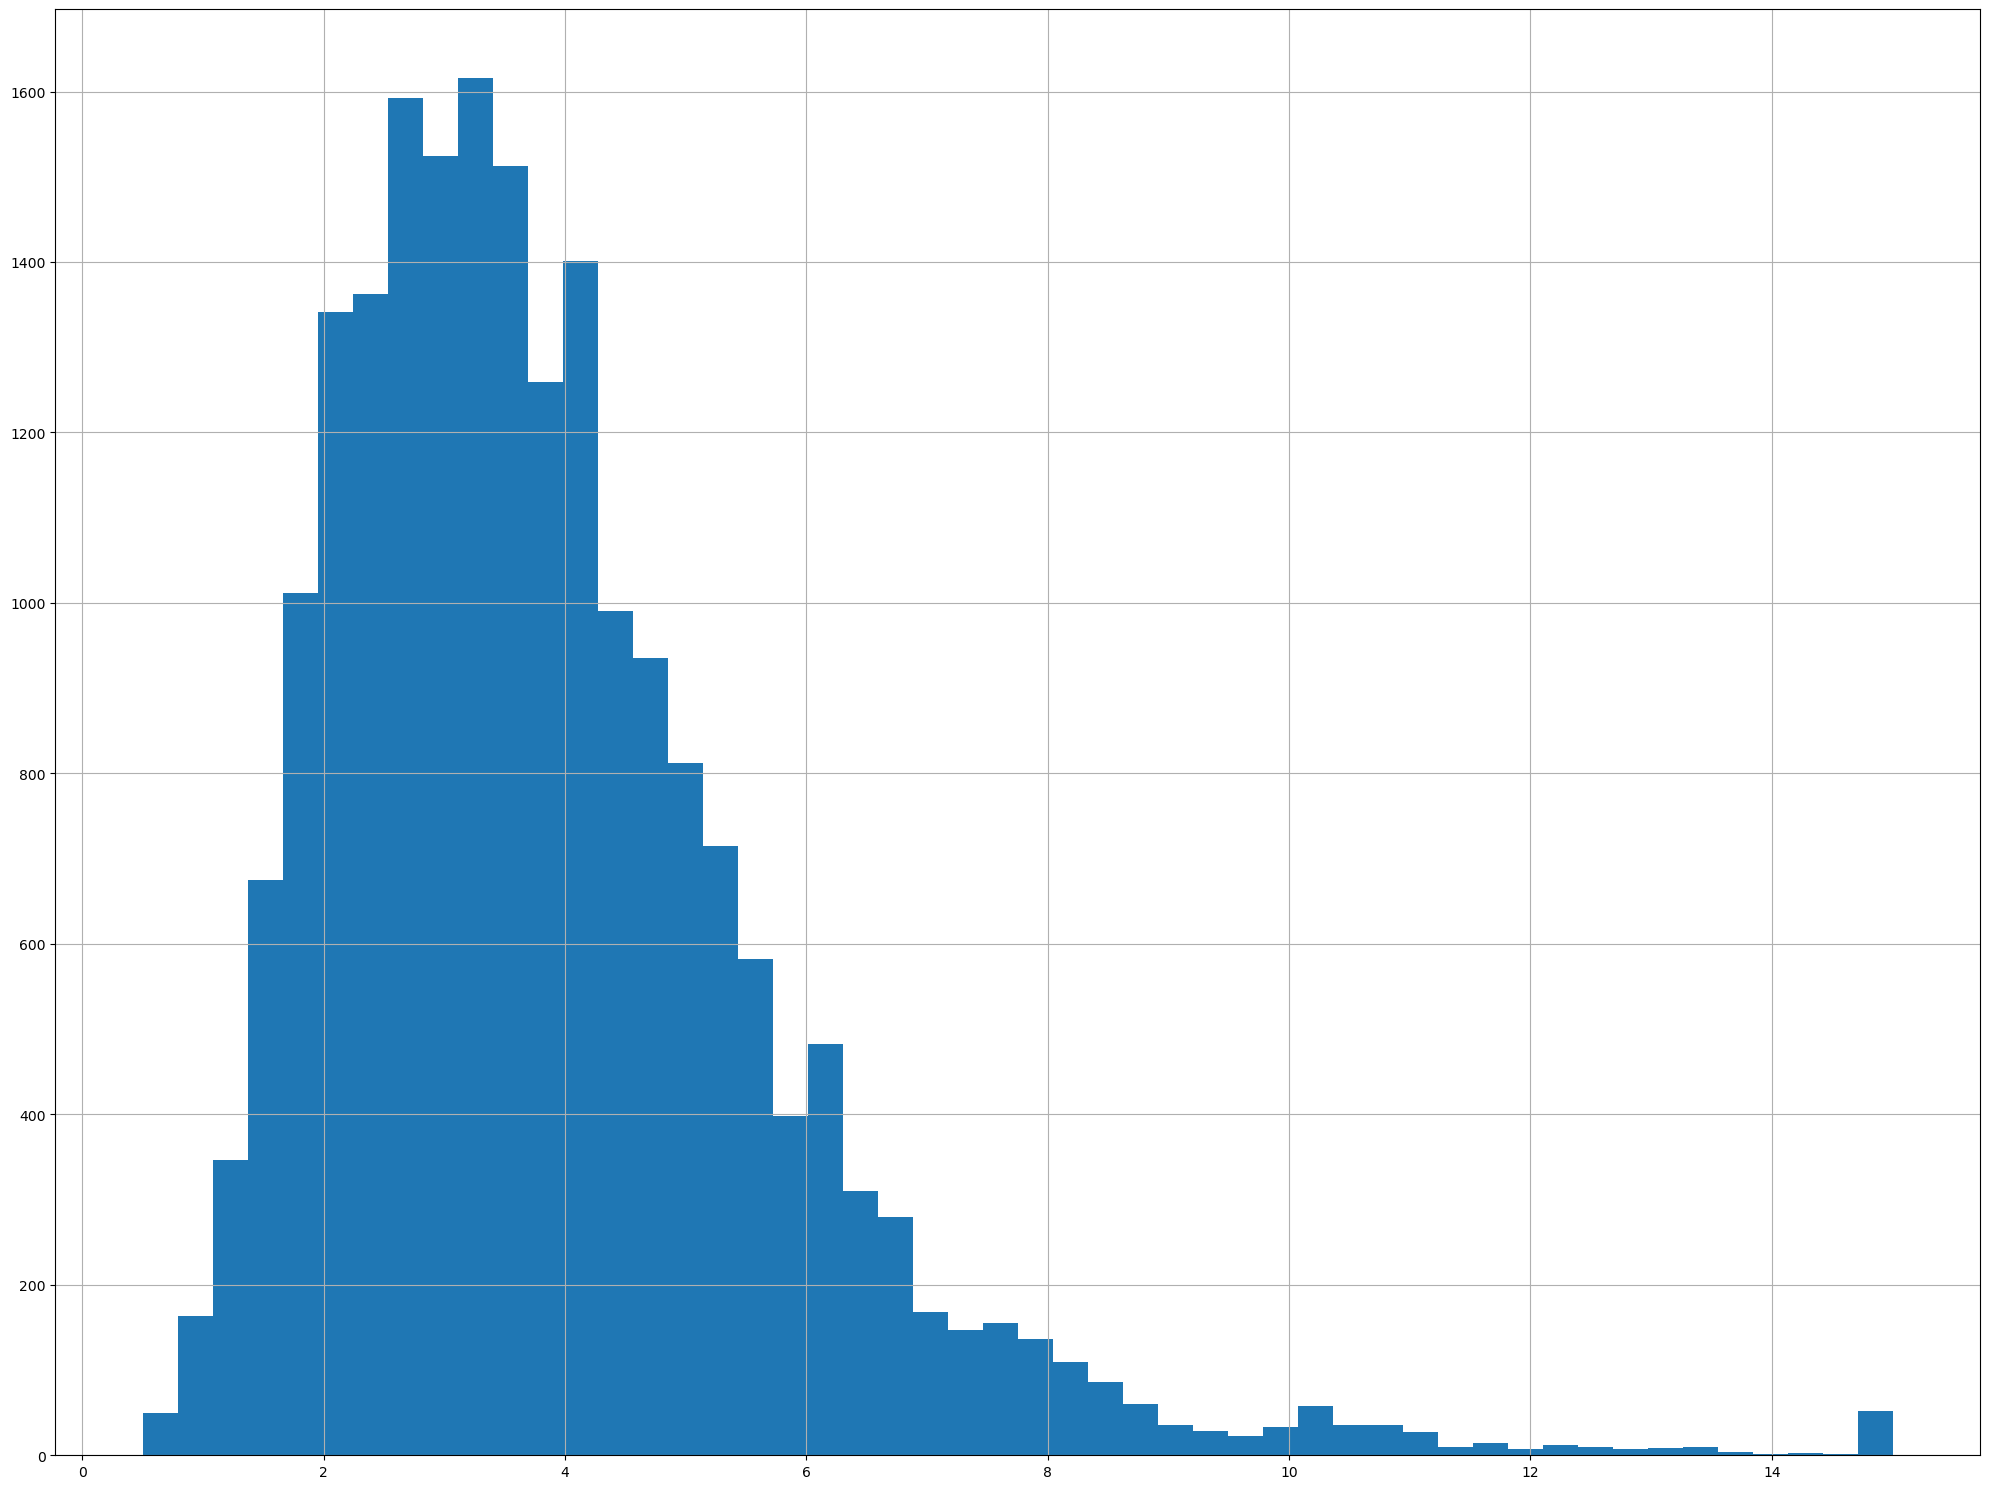

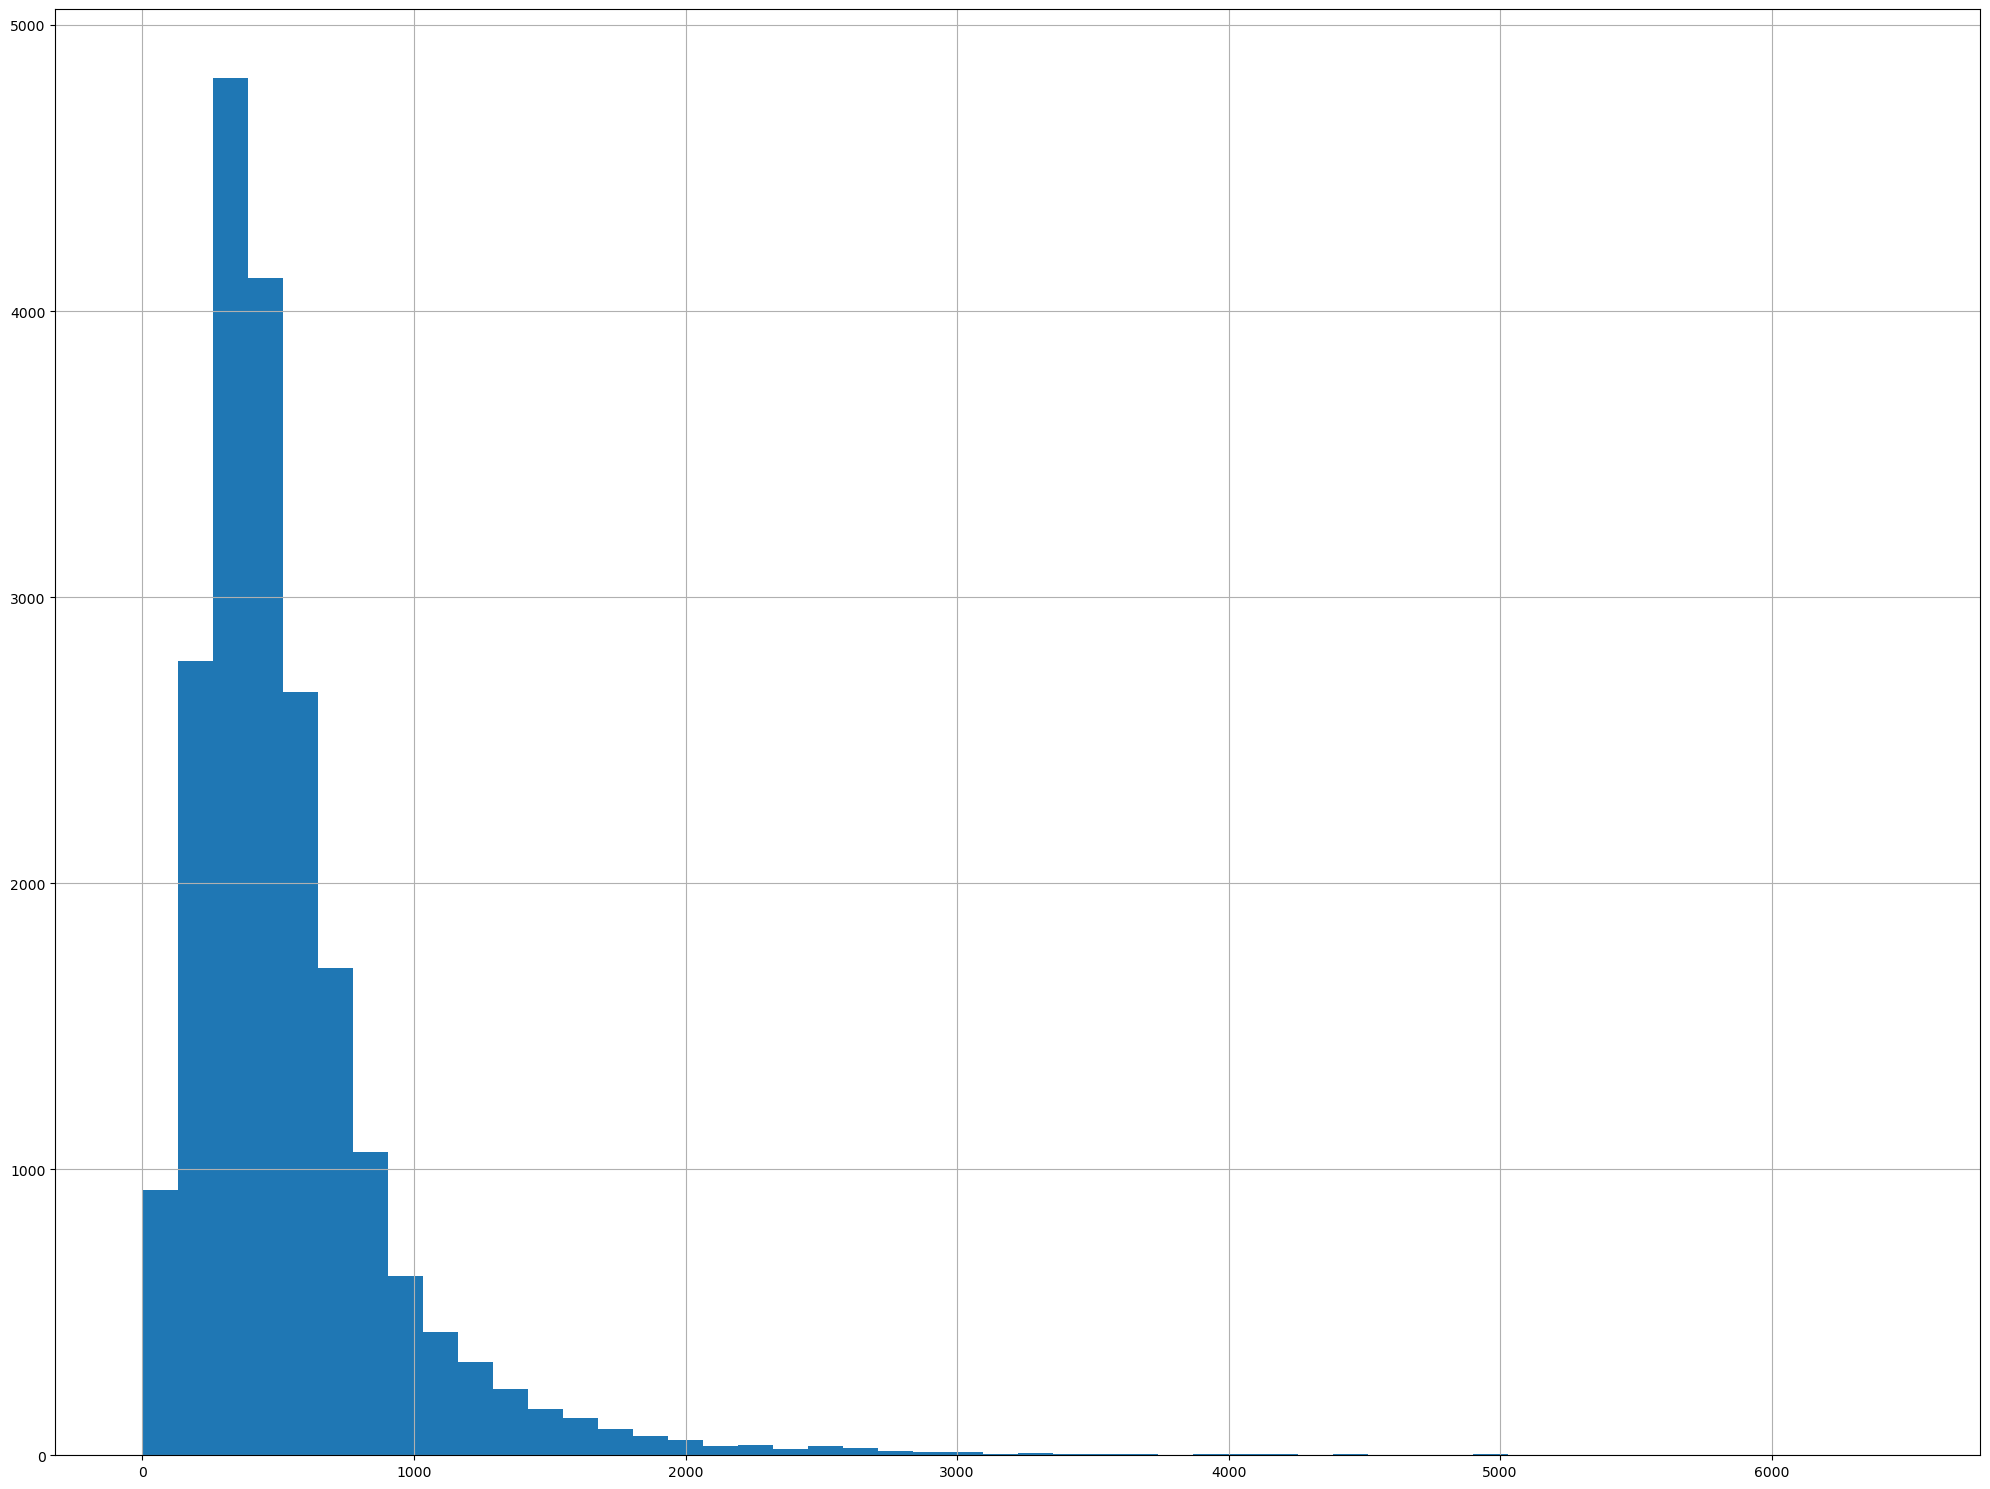

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


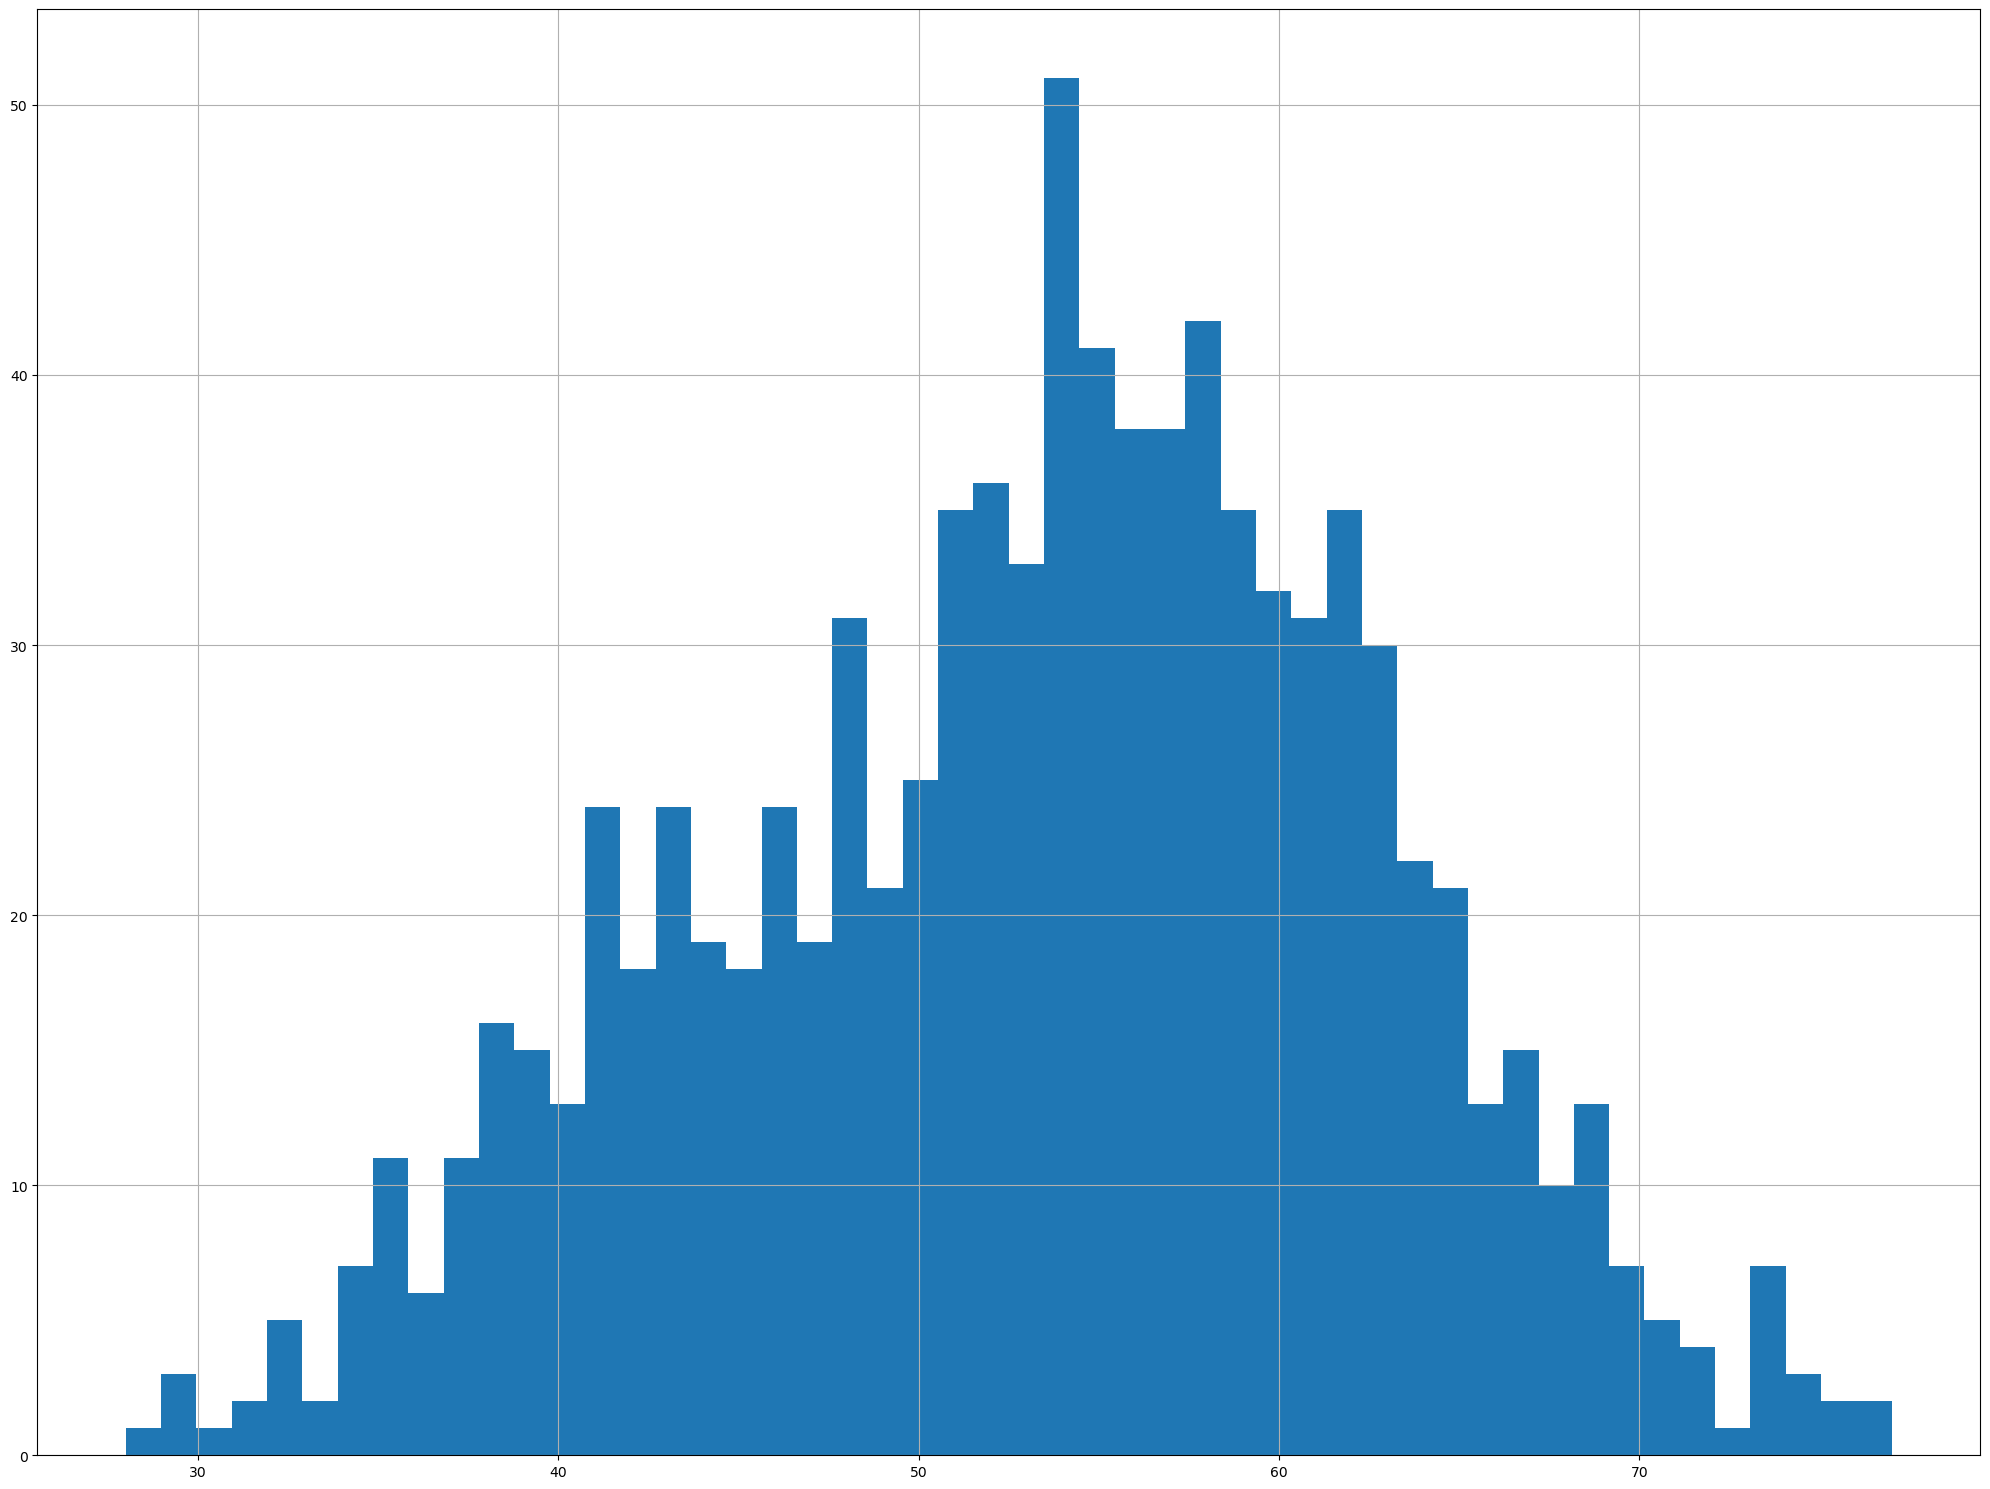

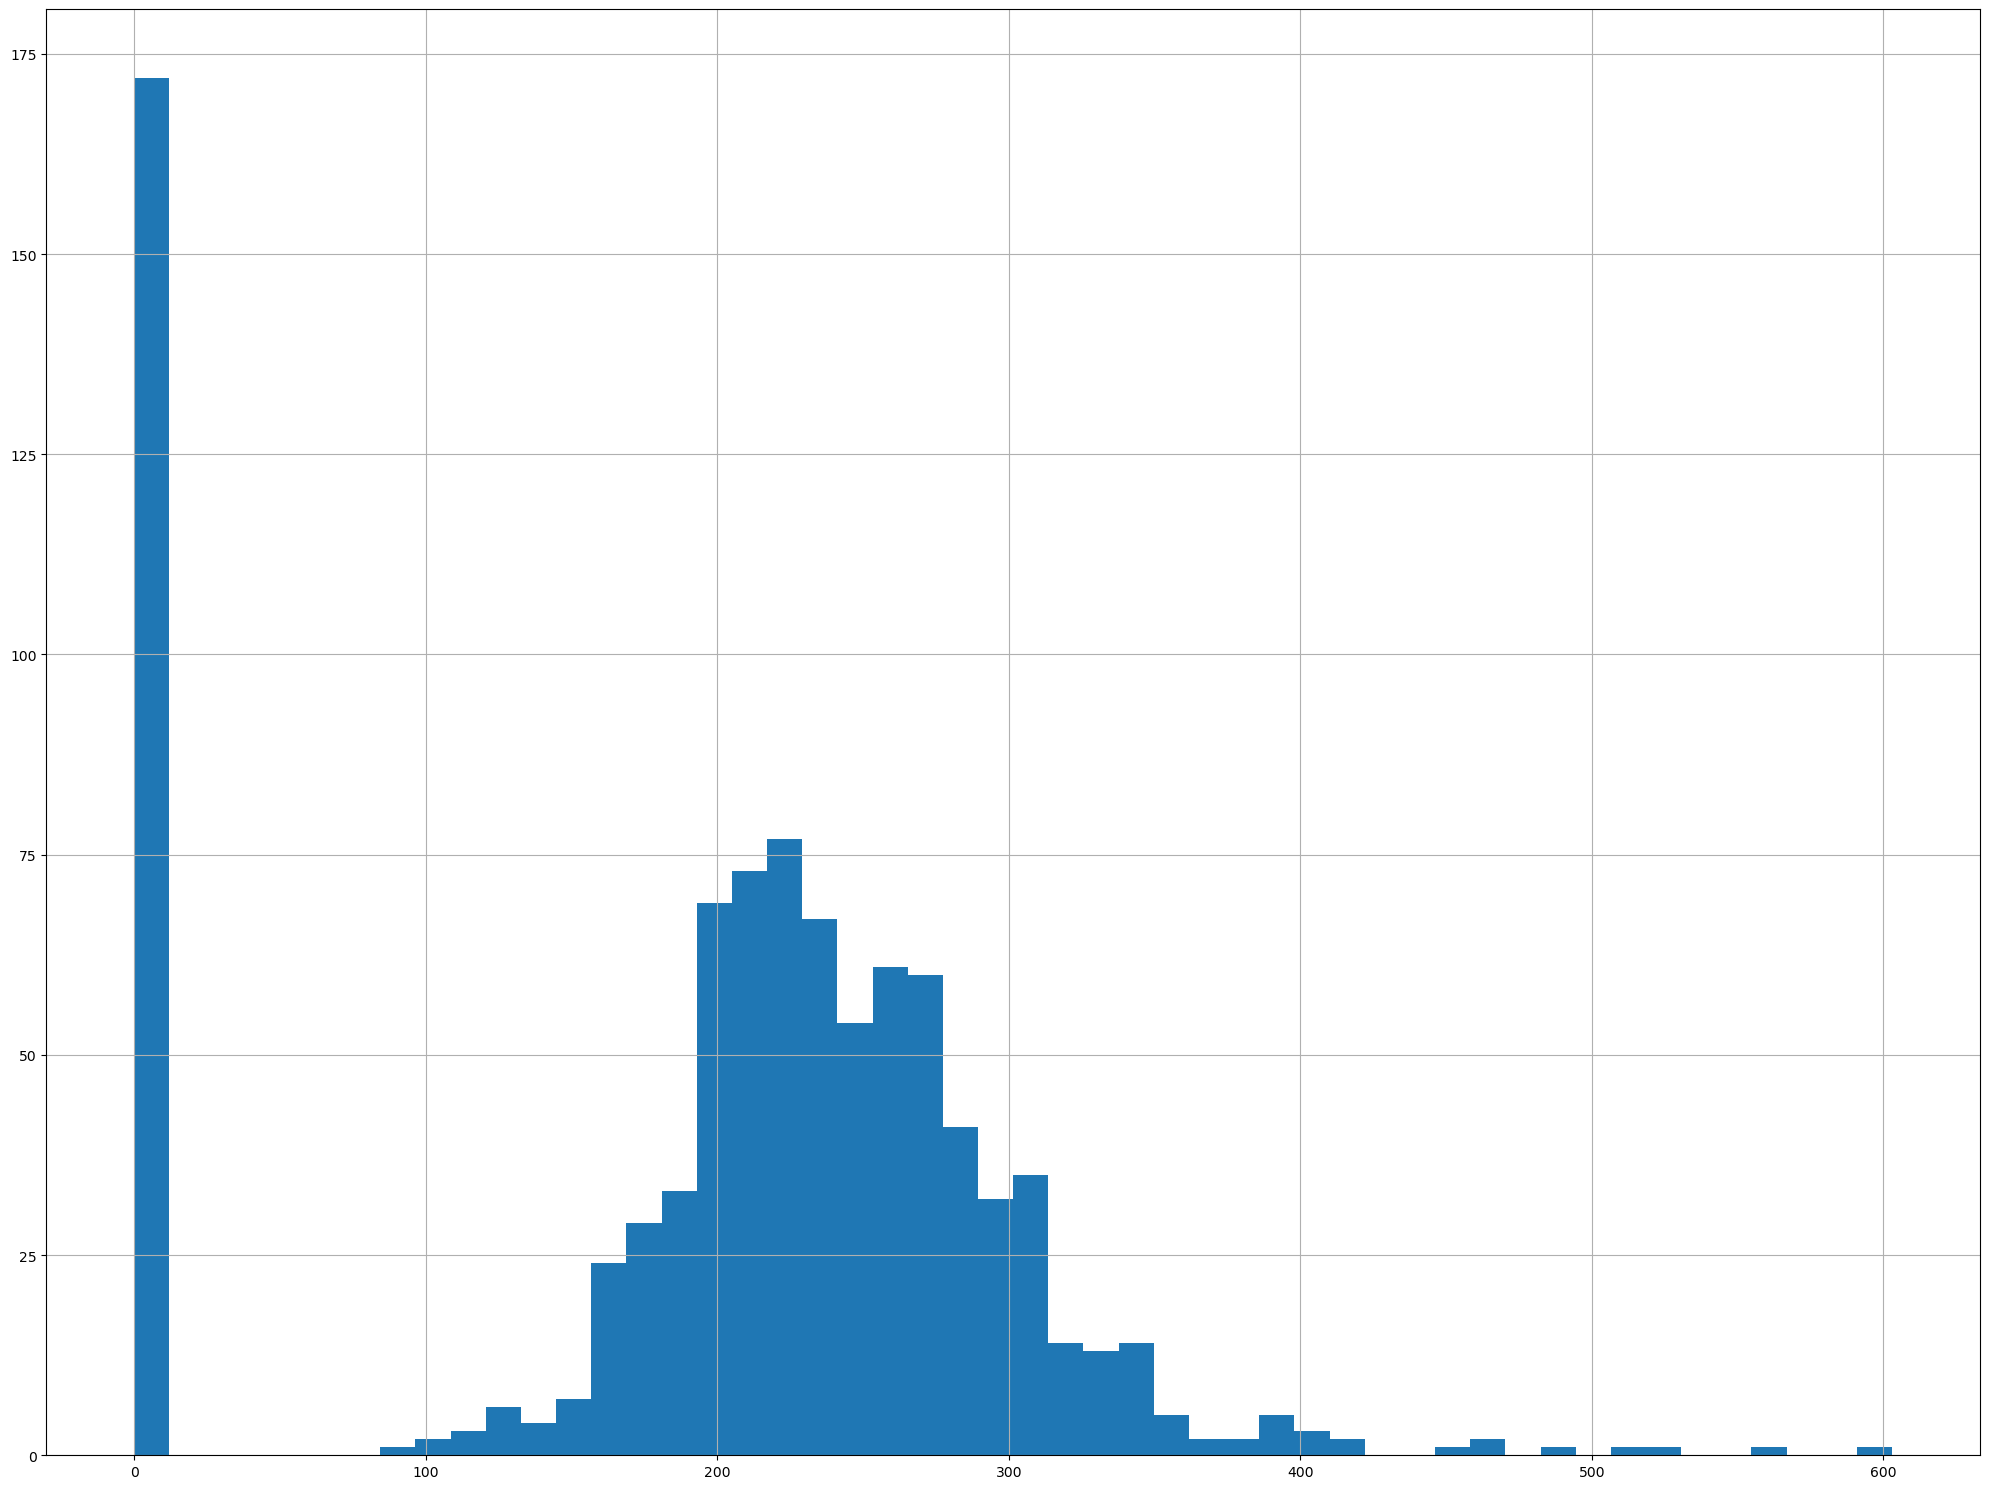

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20640 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude              

In [39]:
# TODO: Data loading and EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. Load housing data
# 2. Display the first few rows
# 3. Show data info (e.g. housing.info())
# 4. Plot histograms
df_housing = pd.read_csv('housing.csv')
df_housing.head(10)
df_housing.info()
df_housing['median_income'].hist(bins=50, figsize=(20, 15))
plt.tight_layout()  # prevents labels from overlapping
plt.show()

df_housing['total_bedrooms'].hist(bins=50, figsize=(20, 15))
plt.tight_layout()  # prevents labels from overlapping
plt.show()


# 5. Load heart data
# 6. Display the first few rows
# 7. Show data info
# 8. Plot relevant columns (bar/histogram)
df_heart = pd.read_csv('heart.csv')
df_heart.head(10)
df_heart.info()
df_heart['Age'].hist(bins=50, figsize=(20, 15))
plt.tight_layout()  # prevents labels from overlapping
plt.show()

df_heart['Cholesterol'].hist(bins=50, figsize=(20, 15))
plt.tight_layout()  # prevents labels from overlapping
plt.show()

# TODO: Handle missing values if any
# TODO: Convert categorical to numeric
# TODO: Create at least one new feature
df_housing['total_bedrooms'] = df_housing['total_bedrooms'].fillna(df_housing['total_bedrooms'].median())
df_housing.info()


df_housing['rooms_per_household'] = df_housing['total_bedrooms'] / df_housing['households']

heart_cat = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
df_heart = pd.get_dummies(df_heart, columns=heart_cat, drop_first=True)

housing_cat = ['ocean_proximity']
df_housing = pd.get_dummies(df_housing, columns=housing_cat, drop_first=True)

df_housing.info()
df_heart.info()

### 2. Linear Regression with Regularization and Cross Validation (12 points)

We will focus on the **Housing** dataset for the regression tasks.

#### 2.1 Train-Test Split (2 points)

Split the **housing** dataset into 80% train and 20% test. **Important**: ensure you also separate the **target** (`median_house_value`) from the input features.

In [40]:
# TODO: Housing train-test split
from sklearn.model_selection import train_test_split

# Example:

X = df_housing.drop('median_house_value', axis=1)
y = df_housing['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2.2 Baseline Linear Regression + Evaluation (2 points)

1. Train a standard linear regression (no regularization) on the training set.
2. Compute the Mean Squared Error (MSE) on both the training and test sets.
3. Print the RMSE (square root of MSE).
4. Briefly comment in a Markdown cell: Is there a large gap between train and test RMSE?

In [41]:
# TODO: Baseline Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# 1. Fit
# 2. Predict on train and test
# 3. Compute MSE, RMSE
# beta_1 = ((X_train - X_train.mean()) * (y_train - y_train.mean())).sum()/(X_train - X_train.mean()).sum()
# beta_0 = y_train.mean() - beta_1 * X_train.mean()

# print(beta_1, beta_0)

# train_loss = ((y_train - beta_0 - beta_1 * X_train)**2).mean()
# test_loss = ((y_test - beta_0 - beta_1 * X_test)**2).mean()

# print(train_loss, test_loss)

model = LinearRegression()
model.fit(X, y)

train_pred = model.predict(X_train)
test_pred = model.predict(X_test)

# Compute MSE using sklearn
train_loss = mean_squared_error(y_train, train_pred)
test_loss = mean_squared_error(y_test, test_pred)

print("Train MSE:", train_loss)
print("Test MSE:", test_loss)

print("Train RMSE:", np.sqrt(train_loss))
print("Test RMSE:", np.sqrt(test_loss))


Train MSE: 4665473902.463488
Test MSE: 4876677429.397113
Train RMSE: 68304.27440844012
Test RMSE: 69833.21150711252


**[TODO: Provide your responses here. ]**

There is a relatively small gap between the training and testing set. Albeit, it seems like the errors are massive, though this may be in line with the fact that median house prices are also insanely large.

#### 2.3 Ridge Regression and Cross Validation (8 points)

1. Use **Ridge** regression (`sklearn.linear_model.Ridge`) with a few different values of $\lambda$ (called `alpha` in `sklearn`)—for example: `[0.0, 0.01, 0.1, 1.0, 10.0, 100.0]`.
2. Use **cross validation** (`cross_val_score` or `KFold` + `for loop`) on the **training set** to estimate how well each alpha performs.
3. Plot alpha values (x-axis) vs. average RMSE across folds (y-axis). You can also store or print these average values in a table if you prefer.
4. Choose the alpha that yields the best average RMSE and refit a final Ridge model on the entire training set.
5. Evaluate the final model’s performance on the test set. Compare it with the baseline from Section 2.2.

Best alpha based on cross-validation: 1.0
Cross-validation RMSE for best alpha: 68432.0193
Test RMSE with alpha=1.0: 70719.6234


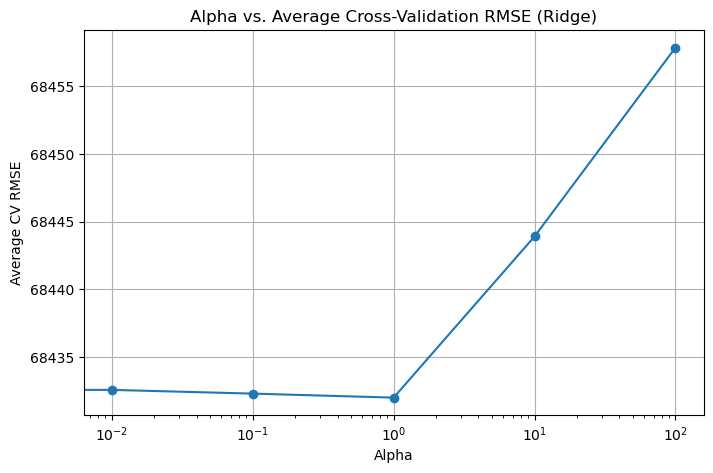

In [42]:
# TODO: Ridge regression cross validation
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score, KFold

# 1. alpha_list = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0]
alpha_list = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0]
avg_cv_rmse_list = []

# 2. cross_val each alpha
for alpha in alpha_list:
    # Create a Ridge model with the current alpha
    ridge_model = Ridge(alpha=alpha)
    
    neg_mse_scores = cross_val_score(
        ridge_model, 
        X_train, 
        y_train, 
        scoring="neg_mean_squared_error", 
        cv=5  # 5-fold cross-validation
    )
    
    # Calculate the actual mean MSE (mean of positive MSE values)
    mean_mse = -np.mean(neg_mse_scores)
    
    # Convert MSE to RMSE
    rmse = np.sqrt(mean_mse)
    
    # 3. store average CV RMSE
    avg_cv_rmse_list.append(rmse)

# 4. pick best alpha
best_alpha_index = np.argmin(avg_cv_rmse_list)
best_alpha = alpha_list[best_alpha_index]
best_cv_rmse = avg_cv_rmse_list[best_alpha_index]

print(f"Best alpha based on cross-validation: {best_alpha}")
print(f"Cross-validation RMSE for best alpha: {best_cv_rmse:.4f}")

# 5. re-train on entire train set and evaluate on test set
best_model = Ridge(alpha=best_alpha)
best_model.fit(X_train, y_train)

y_test_pred = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_test_pred)
test_rmse = np.sqrt(test_mse)
print(f"Test RMSE with alpha={best_alpha}: {test_rmse:.4f}")


# TODO: Plot alpha vs. average CV RMSE
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(alpha_list, avg_cv_rmse_list, marker='o')
plt.title("Alpha vs. Average Cross-Validation RMSE (Ridge)")
plt.xlabel("Alpha")
plt.ylabel("Average CV RMSE")
plt.xscale("log")  # Often we look at alpha on a log scale
plt.grid(True)
plt.show()

The regularized model has a slightly higher RMSE than the non regularized.

### 3. Logistic Regression with Regularization and Cross Validation (10 points)

We will focus on the **Heart Disease** dataset for classification tasks.

#### 3.1 Train-Test Split (2 points)

Split the **heart** dataset into 80% train and 20% test. Separate out the target column (often labeled something like `target` or `condition` in heart datasets).

In [43]:
# TODO: Heart train-test split

X = df_heart.drop('HeartDisease', axis=1)
y = df_heart['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### 3.2 Baseline Logistic Regression (3 points)

1. Train a standard logistic regression (with no regularization or `C` very large in `LogisticRegression`) on the training set.
2. Print out classification accuracy on **both** the training and test sets.
3. Also print out or compute other metrics such as **precision**, **recall**, or an $F_1$ score on the test set.  You can use `sklearn.metrics.classification_report` or compute manually.

In [44]:
# TODO: Logistic Regression baseline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

# 1. Fit
model_heart = LogisticRegression()
model_heart.fit(X_train, y_train)

# 2. Evaluate (accuracy, precision, recall, f1)
y_pred = model_heart.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

precision = precision_score(y_test, y_pred, average='binary')

recall = recall_score(y_test, y_pred, average='binary')

f1 = f1_score(y_test, y_pred, average='binary')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Also print a full classification report for more detailed metrics per class.
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8478260869565217
Precision: 0.8910891089108911
Recall: 0.8411214953271028
F1 Score: 0.8653846153846154

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



/Users/jasonwan/miniforge3/envs/pytorch113/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### 3.3 Logistic Regression + Cross Validation (5 points)

1. Choose a list of `C` values (the inverse of $\lambda$ in logistic regression). For example: `[0.001, 0.01, 0.1, 1.0, 10.0, 100.0]`.
2. Perform **cross validation** on the training set to estimate the average accuracy (or $F_1$) for each `C`.
3. Plot the metric vs. `C` on a simple line plot.
4. Pick the best `C` and retrain on the entire training set. Evaluate on the test set.
5. In a short Markdown cell, discuss how increasing/decreasing `C` affects the decision boundary complexity.

C = 0.001: Average CV Accuracy = 0.7398
C = 0.01: Average CV Accuracy = 0.8283
C = 0.1: Average CV Accuracy = 0.8692
C = 1.0: Average CV Accuracy = 0.8651
C = 10.0: Average CV Accuracy = 0.8610
C = 100.0: Average CV Accuracy = 0.8624


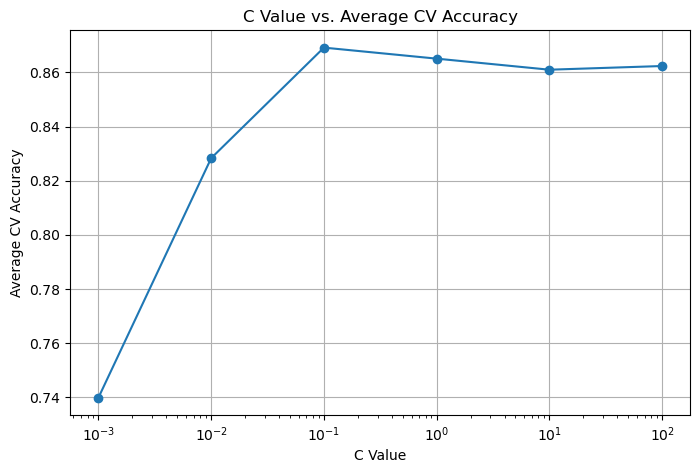

Best C value based on cross-validation: 0.1
Test Accuracy: 0.8369565217391305

Classification Report on Test Set:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82        77
           1       0.90      0.81      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [45]:
# TODO: Logistic Regression cross validation for classification
from sklearn.model_selection import cross_val_score

# 1. c_list = [...]
# 2. for c in c_list:
#       log_reg = LogisticRegression(C=c, solver='liblinear', ...)
#       scores = cross_val_score(log_reg, X_train, y_train, cv=..., scoring='accuracy')
#       ...
# 3. Plot c vs. average CV score
# TODO: Final evaluation on test set after picking best C

C_values = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
avg_cv_scores = []

# 2. Perform cross-validation for each C value on the training set
for c in C_values:
    log_reg = LogisticRegression(C=c, solver='liblinear')
    
    # Perform cross-validation, using accuracy as the scoring metric.
    cv_scores = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')
    
    # Calculate the mean (average) accuracy from the 5 folds.
    avg_accuracy = np.mean(cv_scores)
    
    # Append the average accuracy to our list.
    avg_cv_scores.append(avg_accuracy)
    
    # Print the average CV accuracy for this C.
    print(f"C = {c}: Average CV Accuracy = {avg_accuracy:.4f}")

# 3. Plot C versus the average cross-validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(C_values, avg_cv_scores, marker='o')
plt.xlabel("C Value")
plt.ylabel("Average CV Accuracy")
plt.title("C Value vs. Average CV Accuracy")
plt.xscale("log")  # Use a log scale on x-axis since C values span several orders of magnitude.
plt.grid(True)
plt.show()

# 4. Pick the best C value that has the highest average CV accuracy
best_C = C_values[np.argmax(avg_cv_scores)]
print(f"Best C value based on cross-validation: {best_C}")

# Retrain the final model on the entire training set using the best C value.
best_log_reg = LogisticRegression(C=best_C, solver='liblinear')
best_log_reg.fit(X_train, y_train)

# 5. Evaluate the final model on the test set
y_pred_test = best_log_reg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_pred_test)

print("Test Accuracy:", test_accuracy)
print("\nClassification Report on Test Set:\n", classification_report(y_test, y_pred_test))

**[TODO: Provide your responses here. ]**

Effect of C on Decision Boundary Complexity:

- Small C (e.g., 0.001):

With a small C value, the regularization is strong. This means the model is forced to keep the coefficients (weights) small, leading to a simpler, smoother decision boundary. In simple terms, the model becomes less sensitive to the training data details and may underfit if too much regularization is applied.

- Large C (e.g., 100.0):

A large C value implies weak regularization, allowing the model to fit more complex patterns in the data. The decision boundary can become more flexible and may capture intricate relationships, but it also risks overfitting the training data if it’s too complex.

### 4. Implement Gradient Descent and Compare with Sklearn (10 points)

In this task, you will implement gradient descent from scratch to perform linear regression on the Housing dataset and compare your implementation with sklearn's `LinearRegression`.

**Instructions:**

- **Implement Gradient Descent:**  
  1. Use the Mean Squared Error (MSE) as the loss function:
$$
     J(\boldsymbol{w}, b) = \frac{1}{n} \sum_{i=1}^{n}\left(\hat{y}_i - y_i\right)^2, \quad \text{where} \quad \hat{y}_i = \boldsymbol{w}^\top \boldsymbol{x}_i + b.
$$
  2. Initialize the weights and bias (you may combine them into one vector by adding a bias term to your feature matrix).
  3. Set a learning rate (e.g., `lr = 0.01`) and choose the number of iterations.
  4. At each iteration, compute the gradient with respect to the weights and bias, update them, and record the training MSE.
  5. Plot the training MSE versus the iteration number to observe the convergence.

- **Comparison with Sklearn:**  
  1. After implementing gradient descent, print the final learned coefficients and bias.
  2. Train a linear regression model using sklearn's `LinearRegression` on the same training data.
  3. Compare the coefficients and training MSE from your implementation with those from sklearn's model.
  4. Briefly discuss any differences observed in a Markdown cell.

0.5463215258855586
0.5382598530689746
0.5304687225171161
0.5229389122305487
0.5156615148335484
0.5086279268396477
0.5018298382834255
0.495259222706044
0.4889083274824648
0.4827696644786854
0.47683600102773654
0.4711003512135649
0.4655559674522972
0.46019633236073754
0.45501515090230066
0.4500063428009135
0.4451640352137427
0.44048255565391825
0.43595642515472205
0.43158035166700554
0.427349223681876
0.42325810407096803
0.4193022241368748
0.4154769778665709
0.41177791638089817
0.4082007425734281
0.40474130593223684
0.40139559753835413
0.39815974523485786
0.3950300089607905
0.39200277624427726
0.38907455784940964
0.3862419835716535
0.38350179817670904
0.38085085747793196
0.37828612454758714
0.37580466605736756
0.3734036487437706
0.3710803359940689
0.36883208454876376
0.36665634131654495
0.3645506402979204
0.3625125996138051
0.3605399186354926
0.35863037521254476
0.35678182299526373
0.35499218884851613
0.3532594703537936
0.35158173339649973
0.3499571098355546
0.34838379525250945
0.3468600

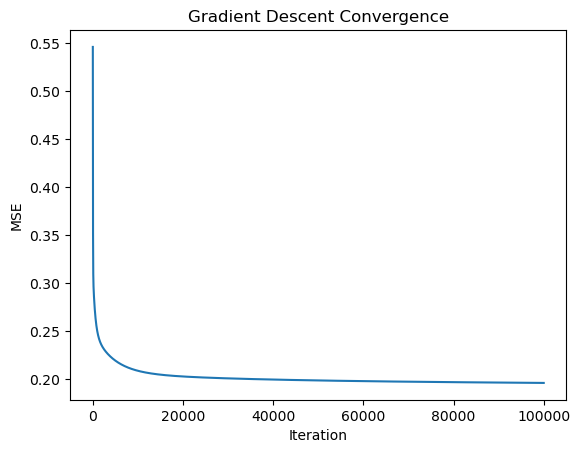

Learned weights from Gradient Descent: [ 1.89797911e-04  1.09707823e-02  4.60720105e-03 -7.80533156e-04
  6.27000507e-04 -3.75556645e-03  3.60850115e-03  1.07274165e-03
 -1.02933144e-03 -6.17839593e-04 -9.70967887e-05 -6.52750423e-05
  5.75849100e-05  1.92386973e-03  2.23729306e-03 -2.24366542e-03]
Sklearn LinearRegression coefficients: [ 5.13421037e-01  1.96086825e-03  5.01237430e-05 -5.84635854e-04
  1.20537215e-01 -7.70020878e-04  5.79606910e-02  1.40056313e-01
 -1.97071112e-01 -1.96716216e-01 -1.48773362e-01 -2.20509356e-02
 -4.09436941e-02  1.68358479e-01  1.59475897e-01 -2.12908339e-01]


In [65]:
# TODO: Implement Gradient Descent for Linear Regression
import numpy as np
import matplotlib.pyplot as plt

# Assume X_train and y_train are defined from previous parts.
# Add a column of ones to account for the bias term
n_samples, n_features = X_train.shape
X_train_bias = np.hstack((np.ones((n_samples, 1)), X_train))  # shape: (n_samples, n_features+1)

# Initialize weights (including bias) to zeros
w = np.zeros(n_features + 1)  # shape: (n_features+1, )

# Hyperparameters
lr = 0.0000001
num_iters = 100000

# To store MSE for each iteration
mse_history = []

for i in range(num_iters):
    # TODO: Compute predictions: ...
    y_pred =  X_train_bias.dot(w)
    
    # TODO: Compute error: ...
    residuals = y_pred - y_train
    
    
    # TODO: Compute gradient: ...
    gradient = (2 / n_samples) * X_train_bias.T.dot(residuals)
    
    # TODO: Update weights: ...
    w = w - lr * gradient
    
    # TODO: Compute current MSE and append to mse_history
    mse = np.mean(residuals**2)
    mse_history.append(mse)
    print(mse)

# Plot the training MSE vs. iteration
plt.plot(mse_history)
plt.xlabel("Iteration")
plt.ylabel("MSE")
plt.title("Gradient Descent Convergence")
plt.show()


# Print learned weights from gradient descent
print("Learned weights from Gradient Descent:", w)


# Comparison with sklearn's LinearRegression
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# Combine the intercept and coefficients for comparison
sklearn_weights = np.hstack((lin_reg.intercept_, lin_reg.coef_))
print("Sklearn LinearRegression coefficients:", sklearn_weights)

**[TODO: Provide your responses here. ]**

The very small values in my gradient descent weights compared to sklearn’s coefficients suggest that the gradient descent algorithm hasn’t fully “learned” the optimal parameters yet. I've tried many different learning rates - too big and they explode and never converge, and anything small creates weights that are much smaller than sklearn. 